In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Data files
HUD_2019_path = "Data/HUD Exchange Data/2019-PIT-Counts-by-State.csv"
HUD_2018_path = "Data/HUD Exchange Data/2018-PIT-Counts-by-State.csv"
HUD_2017_path = "Data/HUD Exchange Data/2017-PIT-Counts-by-State.csv"
HUD_2016_path = "Data/HUD Exchange Data/2016-PIT-Counts-by-State.csv"
HUD_2015_path = "Data/HUD Exchange Data/2015-PIT-Counts-by-State.csv"

# Read csvs
hud_2019_data = pd.read_csv(HUD_2019_path)
hud_2018_data = pd.read_csv(HUD_2018_path)
hud_2017_data = pd.read_csv(HUD_2017_path)
hud_2016_data = pd.read_csv(HUD_2016_path)
hud_2015_data = pd.read_csv(HUD_2015_path)

In [25]:
hud_2019_data.head()

,State,Number of CoCs,"Overall Homeless, 2019","Overall Homeless - Under 18, 2019","Overall Homeless - Age 18 to 24, 2019","Overall Homeless - Over 24, 2019","Overall Homeless - Female, 2019","Overall Homeless - Male, 2019","Overall Homeless - Transgender, 2019","Overall Homeless - Gender Non-Conforming, 2019",...,"Overall Homeless Parenting Youth Age 18-24, 2019","Sheltered ES Homeless Parenting Youth Age 18-24, 2019","Sheltered TH Homeless Parenting Youth Age 18-24, 2019","Sheltered Total Homeless Parenting Youth Age 18-24, 2019","Unsheltered Homeless Parenting Youth Age 18-24, 2019","Overall Homeless Children of Parenting Youth, 2019","Sheltered ES Homeless Children of Parenting Youth, 2019","Sheltered TH Homeless Children of Parenting Youth, 2019","Sheltered Total Homeless Children of Parenting Youth, 2019","Unsheltered Homeless Children of Parenting Youth, 2019"
0,AK,2.0,1907.0,335.0,204.0,1368.0,761.0,1137.0,6.0,3.0,...,20.0,6.0,14.0,20.0,0.0,27.0,13.0,14.0,27.0,0.0
1,AL,8.0,3261.0,629.0,199.0,2433.0,1383.0,1873.0,3.0,2.0,...,22.0,10.0,11.0,21.0,1.0,34.0,17.0,13.0,30.0,4.0
2,AR,5.0,2717.0,303.0,317.0,2097.0,1022.0,1688.0,4.0,3.0,...,11.0,7.0,4.0,11.0,0.0,15.0,10.0,5.0,15.0,0.0
3,AZ,3.0,10007.0,1602.0,708.0,7697.0,3683.0,6297.0,16.0,11.0,...,58.0,17.0,40.0,57.0,1.0,80.0,26.0,53.0,79.0,1.0
4,CA,44.0,151278.0,14305.0,12673.0,124300.0,50467.0,98404.0,1764.0,643.0,...,1019.0,457.0,291.0,748.0,271.0,1194.0,555.0,357.0,912.0,282.0


In [26]:
new_hud_2019_data = hud_2019_data.dropna()
new_hud_2019_data.head()

,State,Number of CoCs,"Overall Homeless, 2019","Overall Homeless - Under 18, 2019","Overall Homeless - Age 18 to 24, 2019","Overall Homeless - Over 24, 2019","Overall Homeless - Female, 2019","Overall Homeless - Male, 2019","Overall Homeless - Transgender, 2019","Overall Homeless - Gender Non-Conforming, 2019",...,"Overall Homeless Parenting Youth Age 18-24, 2019","Sheltered ES Homeless Parenting Youth Age 18-24, 2019","Sheltered TH Homeless Parenting Youth Age 18-24, 2019","Sheltered Total Homeless Parenting Youth Age 18-24, 2019","Unsheltered Homeless Parenting Youth Age 18-24, 2019","Overall Homeless Children of Parenting Youth, 2019","Sheltered ES Homeless Children of Parenting Youth, 2019","Sheltered TH Homeless Children of Parenting Youth, 2019","Sheltered Total Homeless Children of Parenting Youth, 2019","Unsheltered Homeless Children of Parenting Youth, 2019"
0,AK,2.0,1907.0,335.0,204.0,1368.0,761.0,1137.0,6.0,3.0,...,20.0,6.0,14.0,20.0,0.0,27.0,13.0,14.0,27.0,0.0
1,AL,8.0,3261.0,629.0,199.0,2433.0,1383.0,1873.0,3.0,2.0,...,22.0,10.0,11.0,21.0,1.0,34.0,17.0,13.0,30.0,4.0
2,AR,5.0,2717.0,303.0,317.0,2097.0,1022.0,1688.0,4.0,3.0,...,11.0,7.0,4.0,11.0,0.0,15.0,10.0,5.0,15.0,0.0
3,AZ,3.0,10007.0,1602.0,708.0,7697.0,3683.0,6297.0,16.0,11.0,...,58.0,17.0,40.0,57.0,1.0,80.0,26.0,53.0,79.0,1.0
4,CA,44.0,151278.0,14305.0,12673.0,124300.0,50467.0,98404.0,1764.0,643.0,...,1019.0,457.0,291.0,748.0,271.0,1194.0,555.0,357.0,912.0,282.0


In [27]:
new_hud_2019_data.dtypes

State                                                          object
Number of CoCs                                                float64
Overall Homeless, 2019                                        float64
Overall Homeless - Under 18, 2019                             float64
Overall Homeless - Age 18 to 24, 2019                         float64
                                                               ...   
Overall Homeless Children of Parenting Youth, 2019            float64
Sheltered ES Homeless Children of Parenting Youth, 2019       float64
Sheltered TH Homeless Children of Parenting Youth, 2019       float64
Sheltered Total Homeless Children of Parenting Youth, 2019    float64
Unsheltered Homeless Children of Parenting Youth, 2019        float64
Length: 541, dtype: object

In [28]:
#pulling specific columns to work with
overall2019_df = new_hud_2019_data.loc[:, ["State","Overall Homeless, 2019"]]
overall2019_df

,State,"Overall Homeless, 2019"
0,AK,1907.0
1,AL,3261.0
2,AR,2717.0
3,AZ,10007.0
4,CA,151278.0
5,CO,9619.0
6,CT,3033.0
7,DC,6521.0
8,DE,921.0
9,FL,28328.0


In [29]:
new_overall2019_df = overall2019_df.drop([55], axis=0)
new_overall2019_df

,State,"Overall Homeless, 2019"
0,AK,1907.0
1,AL,3261.0
2,AR,2717.0
3,AZ,10007.0
4,CA,151278.0
5,CO,9619.0
6,CT,3033.0
7,DC,6521.0
8,DE,921.0
9,FL,28328.0


In [9]:
states = new_overall2019_df["State"].tolist()
states

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MP',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [10]:
count2019 = new_overall2019_df["Overall Homeless, 2019"].tolist()
count2019

[1907.0,
 3261.0,
 2717.0,
 10007.0,
 151278.0,
 9619.0,
 3033.0,
 6521.0,
 921.0,
 28328.0,
 10443.0,
 875.0,
 6412.0,
 2315.0,
 2315.0,
 10199.0,
 5471.0,
 2381.0,
 4079.0,
 2941.0,
 18471.0,
 6561.0,
 2106.0,
 8575.0,
 7977.0,
 6179.0,
 1807.0,
 1184.0,
 1357.0,
 9314.0,
 557.0,
 2365.0,
 1396.0,
 8862.0,
 3241.0,
 7169.0,
 92091.0,
 10345.0,
 3944.0,
 15876.0,
 13199.0,
 2535.0,
 1055.0,
 4172.0,
 995.0,
 7467.0,
 25848.0,
 2798.0,
 5783.0,
 314.0,
 1089.0,
 21577.0,
 4538.0,
 1397.0,
 548.0]

In [14]:
#bar graph for 2019 data
sorted_new_overall2019_df = new_overall2019_df.sort_values("Overall Homeless, 2019", ascending = False)
sorted_new_overall2019_df

,State,"Overall Homeless, 2019"
4,CA,151278.0
36,NY,92091.0
9,FL,28328.0
46,TX,25848.0
51,WA,21577.0
20,MA,18471.0
39,OR,15876.0
40,PA,13199.0
10,GA,10443.0
37,OH,10345.0


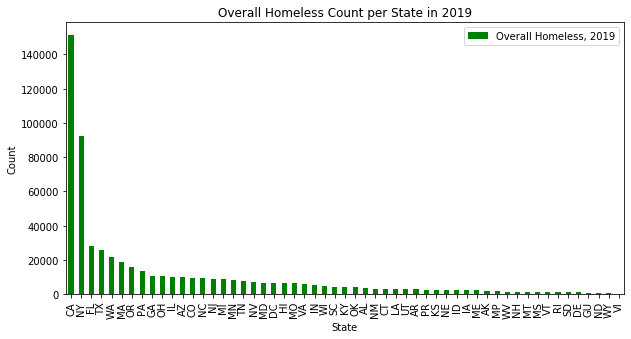

In [15]:
sorted_new_overall2019_df.plot(kind = "bar", color = "green", figsize = (10, 5), title = "Overall Homeless Count per State in 2019", x="State")
plt.ylabel("Count")
plt.savefig("Images/Overall ")

In [16]:
#getting sum for all states minus top five
removed_CA = new_overall2019_df.drop([4], axis=0)
removed_CAandNY = removed_CA.drop([36], axis=0)
removed_CAandNYandFL = removed_CAandNY.drop([9], axis=0)
removed_CAandNYandFLandTX = removed_CAandNYandFL.drop([46], axis=0)
removed_CAandNYandFLandTXandWA = removed_CAandNYandFLandTX.drop([51], axis=0)
allotherstatehomelesscount_minusCAandNYandFLandTXandWA = removed_CAandNYandFLandTXandWA["Overall Homeless, 2019"].sum()
allotherstatehomelesscount_minusCAandNYandFLandTXandWA

248593.0

(-1.100385716327534,
 1.1000183674441684,
 -1.1276627393211485,
 1.1108661990895141)

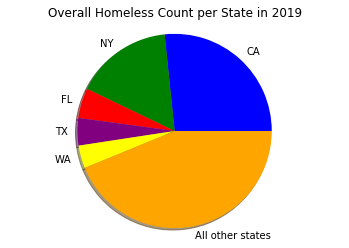

In [17]:
#piechart for 2019 data
labels = ["CA", "NY", "FL","TX", "WA", "All other states"] 
count = ["151278", "92091","28328", "25848", "21577","248593"]
colors = ["blue", "green", "red", "purple", "yellow", "orange"]
explode = (0,0,0,0,0,0)
plt.pie(count,explode = explode, labels = labels, colors=colors, shadow = "True")
plt.title("Overall Homeless Count per State in 2019")
plt.axis("equal")

In [ ]:
#2018 data

In [13]:
hud_2018_data

,State,Number of CoCs,"Overall Homeless, 2018","Overall Homeless - Under 18, 2018","Overall Homeless - Age 18 to 24, 2018","Overall Homeless - Over 24, 2018","Overall Homeless - Female, 2018","Overall Homeless - Male, 2018","Overall Homeless - Transgender, 2018","Overall Homeless - Gender Non-Conforming, 2018",...,"Overall Homeless Parenting Youth Age 18-24, 2018","Sheltered ES Homeless Parenting Youth Age 18-24, 2018","Sheltered TH Homeless Parenting Youth Age 18-24, 2018","Sheltered Total Homeless Parenting Youth Age 18-24, 2018","Unsheltered Homeless Parenting Youth Age 18-24, 2018","Overall Homeless Children of Parenting Youth, 2018","Sheltered ES Homeless Children of Parenting Youth, 2018","Sheltered TH Homeless Children of Parenting Youth, 2018","Sheltered Total Homeless Children of Parenting Youth, 2018","Unsheltered Homeless Children of Parenting Youth, 2018"
0,AK,2.0,2016.0,349.0,191.0,1476.0,880.0,1129.0,7.0,0.0,...,25.0,14.0,9.0,23.0,2.0,26.0,14.0,10.0,24.0,2.0
1,AL,8.0,3434.0,573.0,157.0,2704.0,1399.0,2025.0,9.0,1.0,...,27.0,11.0,8.0,19.0,8.0,36.0,16.0,13.0,29.0,7.0
2,AR,7.0,2712.0,309.0,213.0,2190.0,1113.0,1593.0,5.0,1.0,...,8.0,5.0,2.0,7.0,1.0,11.0,7.0,2.0,9.0,2.0
3,AZ,3.0,9865.0,1680.0,780.0,7405.0,3460.0,6354.0,34.0,17.0,...,63.0,19.0,35.0,54.0,9.0,81.0,28.0,45.0,73.0,8.0
4,CA,43.0,129972.0,13936.0,12678.0,103358.0,42491.0,85810.0,1252.0,419.0,...,1077.0,567.0,389.0,956.0,121.0,1215.0,631.0,464.0,1095.0,120.0
5,CO,3.0,10857.0,1887.0,808.0,8162.0,3880.0,6926.0,28.0,23.0,...,135.0,32.0,67.0,99.0,36.0,152.0,30.0,86.0,116.0,36.0
6,CT,2.0,3976.0,967.0,254.0,2755.0,1659.0,2310.0,7.0,0.0,...,73.0,33.0,40.0,73.0,0.0,104.0,50.0,54.0,104.0,0.0
7,DC,1.0,6904.0,1933.0,639.0,4332.0,2960.0,3903.0,33.0,8.0,...,232.0,143.0,89.0,232.0,0.0,401.0,265.0,136.0,401.0,0.0
8,DE,1.0,1082.0,227.0,78.0,777.0,490.0,591.0,0.0,1.0,...,13.0,9.0,4.0,13.0,0.0,15.0,9.0,6.0,15.0,0.0
9,FL,27.0,31030.0,5871.0,2371.0,22788.0,11092.0,19799.0,74.0,65.0,...,297.0,176.0,72.0,248.0,49.0,448.0,268.0,118.0,386.0,62.0


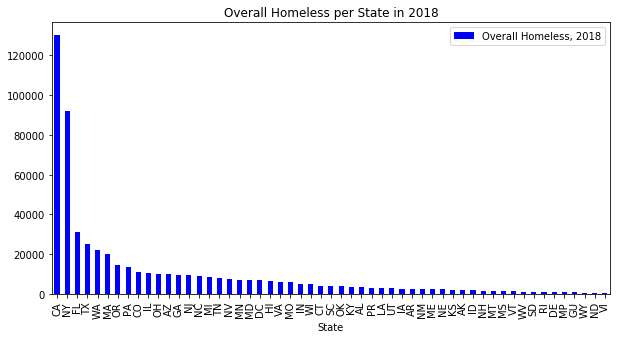

In [18]:
new_hud_2018_data = hud_2018_data.dropna()
overall2018_df = new_hud_2018_data.loc[:, ["State","Overall Homeless, 2018"]]
new_overall2018_df = overall2018_df.drop([55], axis=0)
sorted_new_overall2018_df = new_overall2018_df.sort_values("Overall Homeless, 2018", ascending = False)
sorted_new_overall2018_df.plot(kind = "bar", figsize = (10, 5), color = "blue", title = "Overall Homeless per State in 2018", x="State")

In [ ]:
#2017 data

In [15]:
hud_2017_data.head()

,State,Number of CoCs,"Overall Homeless, 2017","Overall Homeless - Under 18, 2017","Overall Homeless - Age 18 to 24, 2017","Overall Homeless - Over 24, 2017","Overall Homeless - Female, 2017","Overall Homeless - Male, 2017","Overall Homeless - Transgender, 2017","Overall Homeless - Gender Non-Conforming, 2017",...,"Overall Homeless Parenting Youth Age 18-24, 2017","Sheltered ES Homeless Parenting Youth Age 18-24, 2017","Sheltered TH Homeless Parenting Youth Age 18-24, 2017","Sheltered Total Homeless Parenting Youth Age 18-24, 2017","Unsheltered Homeless Parenting Youth Age 18-24, 2017","Overall Homeless Children of Parenting Youth, 2017","Sheltered ES Homeless Children of Parenting Youth, 2017","Sheltered TH Homeless Children of Parenting Youth, 2017","Sheltered Total Homeless Children of Parenting Youth, 2017","Unsheltered Homeless Children of Parenting Youth, 2017"
0,AK,2.0,1845.0,305.0,186.0,1354.0,765.0,1075.0,4.0,1.0,...,22.0,10.0,12.0,22.0,0.0,39.0,20.0,19.0,39.0,0.0
1,AL,8.0,3793.0,528.0,300.0,2965.0,1314.0,2453.0,21.0,5.0,...,23.0,6.0,14.0,20.0,3.0,39.0,11.0,24.0,35.0,4.0
2,AR,6.0,2467.0,265.0,209.0,1993.0,965.0,1499.0,3.0,0.0,...,10.0,8.0,2.0,10.0,0.0,13.0,11.0,2.0,13.0,0.0
3,AZ,3.0,8947.0,1607.0,660.0,6680.0,3331.0,5592.0,22.0,2.0,...,81.0,37.0,44.0,81.0,0.0,112.0,55.0,57.0,112.0,0.0
4,CA,43.0,131532.0,14207.0,13276.0,104049.0,42750.0,87609.0,793.0,380.0,...,770.0,248.0,397.0,645.0,125.0,912.0,289.0,493.0,782.0,130.0


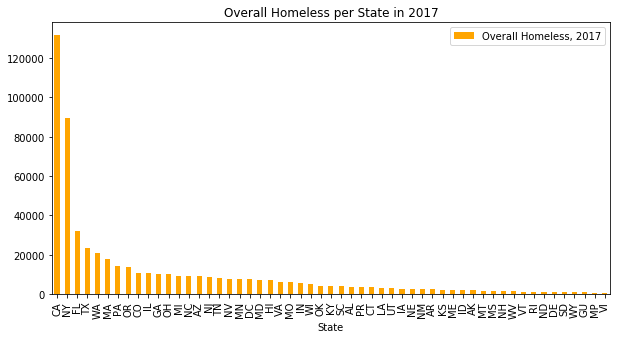

In [19]:
new_hud_2017_data = hud_2017_data.dropna()
overall2017_df = new_hud_2017_data.loc[:, ["State","Overall Homeless, 2017"]]
new_overall2017_df = overall2017_df.drop([55], axis=0)
sorted_new_overall2017_df = new_overall2017_df.sort_values("Overall Homeless, 2017", ascending = False)
sorted_new_overall2017_df.plot(kind = "bar", figsize = (10, 5), color = "orange", title = "Overall Homeless per State in 2017", x="State")